In [1]:
import pandas as pd 

import matplotlib.pyplot as plt

# we use the scikit svm model for this experiment 
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics

import scikitplot as skplt

In [2]:
df = pd.read_csv('./data/authority_dataset.csv').rename(columns={'auth': 'authority'})
df

,ad,authority
0,north korea officially has no corona cases how...,1
1,it seems difficult to stand for something one ...,0
2,senator bernie sanders held a rally with randy...,1
3,life gets busy—don’t wait to send back your ba...,0
4,some issues feel impossible to compromise on b...,1
...,...,...
49661,a recent poll shows sherrod with just a one po...,0
49662,today’s donor goal ⃣ ⃣ ⃣ our endofquarter dead...,0
49663,you’ve been selected after a year of chaos hat...,1
49664,after receiving the corona vaccine a video tha...,0


In [3]:
# vectorize testing and training data 
X_train, X_test, y_train,  y_test = train_test_split(df['ad'], df['authority'] , test_size = 0.33, random_state = 42)

In [4]:
tf_vectorizer = TfidfVectorizer() 

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [5]:
# training the model using a linear kernal
clf = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
clf.fit(X_train_tf, y_train)

accuracy:   0.983
              precision    recall  f1-score   support

no authority       0.97      1.00      0.98      7850
   authority       1.00      0.97      0.98      8278

    accuracy                           0.98     16128
   macro avg       0.98      0.98      0.98     16128
weighted avg       0.98      0.98      0.98     16128

confusion matrix:
[[7820   30]
 [ 238 8040]]



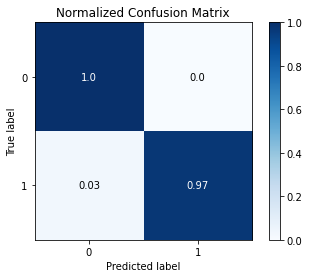

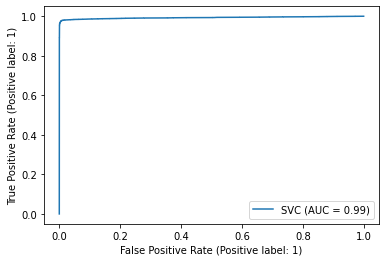

In [ ]:
# predict the labels on validation dataset
predictions = clf.predict(X_test_tf)

# compute the performance measures
score = metrics.accuracy_score(y_test, predictions)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, predictions, target_names=['no authority', 'authority']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, predictions))
print()
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()
svc_disp = metrics.RocCurveDisplay.from_estimator(clf, X_test_tf, y_test)

In [ ]:
df_val = pd.read_csv('./data/sample_auth.csv')
df_val

,ad,authority
0,the european youth event is back in strasbourg...,1
1,learn the greatest tips tricks from the world...,1
2,live women leaders discuss how to accelerateeq...,1
3,if you love motorsport but work in another ind...,0
4,together we can turn the tide to protect our p...,0
...,...,...
103,it takes courage to take control of our life a...,0
104,experts from waseda university are advising ja...,1
105,a team of investigators from the rush universi...,1
106,you should recycle your jeansin the 4th episod...,1


accuracy:   0.648
              precision    recall  f1-score   support

     no-auth       0.72      0.48      0.58        54
        auth       0.61      0.81      0.70        54

    accuracy                           0.65       108
   macro avg       0.67      0.65      0.64       108
weighted avg       0.67      0.65      0.64       108

confusion matrix:
[[26 28]
 [10 44]]



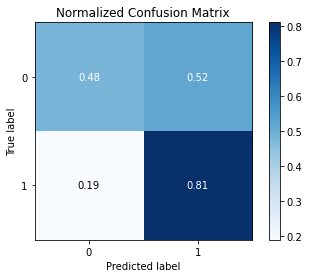

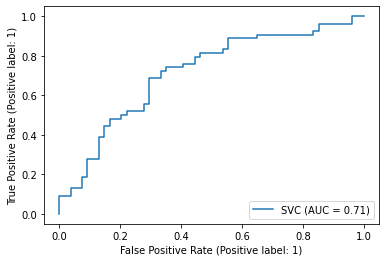

In [ ]:
X_val = tf_vectorizer.transform(df_val['ad'])
y_val = df_val['authority']
y_pred = clf.predict(X_val)

score = metrics.accuracy_score(y_val, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=[ 'no-auth', 'auth']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_val, y_val)